## Data Loading and Preparing

In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [493]:
responses_df_raw = pd.read_csv('survey_results_responses.csv')
questions_df = pd.read_csv('survey_results_questions.csv')

In [494]:
questions_df

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
2,QID6,Country,Where do you live?,True,MC,DL
3,QID7,US_State,In which state or territory of the USA do you ...,False,MC,DL
4,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
5,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR
6,QID149,Age1stCode,At what age did you write your first line of c...,False,MC,MAVR
7,QID276,LearnCode,How did you learn to code? Select all that apply.,False,MC,MAVR
8,QID32,YearsCode,"Including any education, how many years have y...",False,MC,DL
9,QID34,YearsCodePro,"NOT including education, how many years have y...",False,MC,DL


We just want the full questions in correspondance to their short names so, we will make a dictionary that does just that.

In [495]:
question_key = dict(zip(questions_df['qname'], questions_df['question']))

In [496]:
question_key

{'MainBranch': 'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code." ',
 'Employment': 'Which of the following best describes your current employment status?',
 'Country': 'Where do you live? ',
 'US_State': 'In which state or territory of the USA do you live? This information will be kept private.',
 'UK_Country': 'In which part of the United Kingdom do you live? This information will be kept private.',
 'EdLevel': 'Which of the following best describes the highest level of formal education that you’ve completed? *',
 'Age1stCode': 'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project) ',
 'LearnCode': 'How did you learn to code? Select all that apply.',
 'YearsCode': 'Including any education, how many years have you been coding in total?',
 'YearsCodePro': 'NOT including education, how many years have you coded professionally (as a part of your work)?',
 'DevType': 'Which

The dataset contains 48 columns most of which aren't really helpful here so, we'll reduce it and just pick the ones we need.

In [497]:
selected_columns = ["Age",
                    "Gender",
                    "Ethnicity",
                    "Country",
                    "EdLevel",
                    "LearnCode",
                    "MainBranch",
                    "DevType",
                    "Currency",
                    "CompTotal",
                    "CompFreq",
                    "LanguageHaveWorkedWith",
                    "LanguageWantToWorkWith",
                    "DatabaseHaveWorkedWith",
                    "DatabaseWantToWorkWith",
                    "WebframeHaveWorkedWith",
                    "WebframeWantToWorkWith",
                    "NEWCollabToolsHaveWorkedWith",
                    "OperatingSystem",
                    "NEWStuck",
                    ]

In [498]:
responses_df = responses_df_raw[selected_columns].copy()

In [499]:
responses_df

,Age,Gender,Ethnicity,Country,EdLevel,LearnCode,MainBranch,DevType,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,NEWCollabToolsHaveWorkedWith,OperatingSystem,NEWStuck
0,25-34 years old,Man,White or of European descent,Slovakia,"Secondary school (e.g. American high school, G...",Coding Bootcamp;Other online resources (ex: vi...,I am a developer by profession,"Developer, mobile",EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,Laravel;Symfony,NaN,PHPStorm;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...
1,18-24 years old,Man,White or of European descent,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",I am a student who is learning to code,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,Angular;Flask;Vue.js,NaN,Android Studio;IntelliJ;Notepad++;PyCharm,Windows,Visit Stack Overflow;Google it
2,18-24 years old,Man,Prefer not to say,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...","I am not primarily a developer, but I write co...",NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Flask,Flask,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...
3,35-44 years old,Man,White or of European descent,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,I am a developer by profession,"Developer, front-end",EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...
4,25-34 years old,Man,White or of European descent,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Friend or family member,I am a developer by profession,"Developer, desktop or enterprise applications;...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Flask,Flask,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim,Linux-based,Visit Stack Overflow;Go for a walk or other ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,25-34 years old,Man,White or of European descent,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",I am a developer by profession,"Developer, back-end",USD\tUnited States dollar,160500.0,Yearly,Clojure;Kotlin;SQL,Clojure,Oracle;SQLite,SQLite,NaN,NaN,IntelliJ;Sublime Text;Vim;Visual Studio Code,MacOS,Call a coworker or friend;Google it
83435,18-24 years old,Man,Black or of African descent,Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",I am a developer by profession,"Developer, full-stack",XOF\tWest African CFA franc,200000.0,Monthly,NaN,NaN,Firebase;MariaDB;MySQL;PostgreSQL;Redis;SQLite,Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redi...,Django;jQuery;Laravel;React.js;Ruby on Rails,Django;Express;jQuery;Laravel;React.js;Ruby on...,Android Studio;Eclipse;Emacs;IntelliJ;NetBeans...,Linux-based,Call a coworker or friend;Visit Stack Overflow...
83436,25-34 years old,Man,White or of European descent,United States of America,"Secondary school (e.g. American high school, G...",School,I am a developer by profession,Data scientist or machine learning specialist;...,USD\tUnited States dollar,1800.0,Weekly,Groovy;Java;Python,Java;Python,DynamoDB;Elasticsearch;MongoDB;PostgreSQL;Redis,DynamoDB;Redis,FastAPI;Flask,FastAPI;Flask,Android Studio;Eclipse;IntelliJ;IPython/Jupyte...,Windows,Call a coworker or friend;Visit Stack Overflow...
83437,25-34 years old,Man,White or of European descent,Canada,"Bachelor’s degree (B.A., B.S., B.En

Let's convert all salaries to yearly salaries for easier computation.

In [500]:
responses_df.loc[responses_df['CompFreq'] == 'Monthly', 'CompTotal'] *= 12

In [501]:
responses_df.drop('CompFreq', axis=1, inplace=True)
responses_df

,Age,Gender,Ethnicity,Country,EdLevel,LearnCode,MainBranch,DevType,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,NEWCollabToolsHaveWorkedWith,OperatingSystem,NEWStuck
0,25-34 years old,Man,White or of European descent,Slovakia,"Secondary school (e.g. American high school, G...",Coding Bootcamp;Other online resources (ex: vi...,I am a developer by profession,"Developer, mobile",EUR European Euro,57600.0,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,Laravel;Symfony,NaN,PHPStorm;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...
1,18-24 years old,Man,White or of European descent,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",I am a student who is learning to code,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,Angular;Flask;Vue.js,NaN,Android Studio;IntelliJ;Notepad++;PyCharm,Windows,Visit Stack Overflow;Google it
2,18-24 years old,Man,Prefer not to say,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...","I am not primarily a developer, but I write co...",NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Flask,Flask,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...
3,35-44 years old,Man,White or of European descent,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,I am a developer by profession,"Developer, front-end",EUR European Euro,NaN,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...
4,25-34 years old,Man,White or of European descent,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Friend or family member,I am a developer by profession,"Developer, desktop or enterprise applications;...",GBP\tPound sterling,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Flask,Flask,Atom;IPython/Jupyter;Notepad++;PyCharm;Vim,Linux-based,Visit Stack Overflow;Go for a walk or other ph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,25-34 years old,Man,White or of European descent,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",I am a developer by profession,"Developer, back-end",USD\tUnited States dollar,160500.0,Clojure;Kotlin;SQL,Clojure,Oracle;SQLite,SQLite,NaN,NaN,IntelliJ;Sublime Text;Vim;Visual Studio Code,MacOS,Call a coworker or friend;Google it
83435,18-24 years old,Man,Black or of African descent,Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",I am a developer by profession,"Developer, full-stack",XOF\tWest African CFA franc,2400000.0,NaN,NaN,Firebase;MariaDB;MySQL;PostgreSQL;Redis;SQLite,Firebase;MariaDB;MongoDB;MySQL;PostgreSQL;Redi...,Django;jQuery;Laravel;React.js;Ruby on Rails,Django;Express;jQuery;Laravel;React.js;Ruby on...,Android Studio;Eclipse;Emacs;IntelliJ;NetBeans...,Linux-based,Call a coworker or friend;Visit Stack Overflow...
83436,25-34 years old,Man,White or of European descent,United States of America,"Secondary school (e.g. American high school, G...",School,I am a developer by profession,Data scientist or machine learning specialist;...,USD\tUnited States dollar,1800.0,Groovy;Java;Python,Java;Python,DynamoDB;Elasticsearch;MongoDB;PostgreSQL;Redis,DynamoDB;Redis,FastAPI;Flask,FastAPI;Flask,Android Studio;Eclipse;IntelliJ;IPython/Jupyte...,Windows,Call a coworker or friend;Visit Stack Overflow...
83437,25-34 years old,Man,White or of European descent,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Online Courses or Certification;Books / Physic...,

We need to clean the currencies column since some of them have tab characters in them and some do not.

In [502]:
for i in range(responses_df.shape[0]):
    if '\t' in str(responses_df.loc[i, 'Currency']):
        responses_df.loc[i, 'Currency'] = str(responses_df.loc[i, 'Currency']).replace("\t", ' ')

In [503]:
sns.set_theme(style='whitegrid')

## Exploratory Analysis

### Age

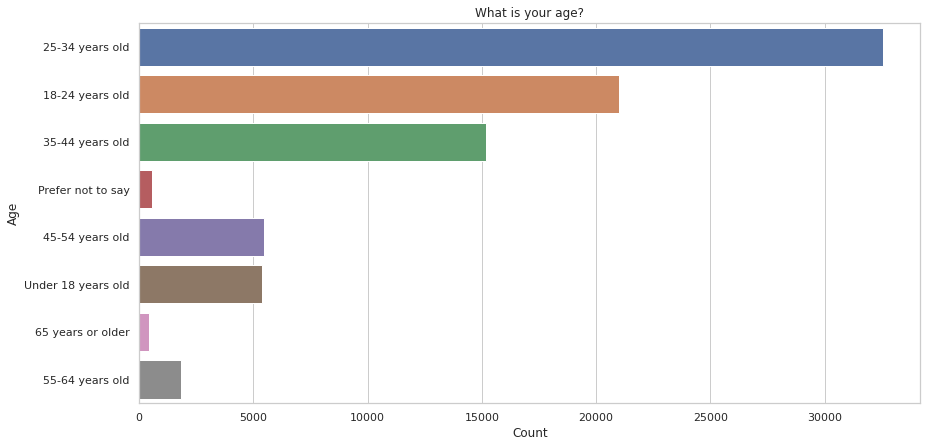

In [504]:
plt.figure(figsize=(14, 7))
sns.countplot(y=responses_df.Age)
plt.xlabel('Count')
plt.ylabel('Age')
plt.title(question_key['Age']);

### Gender

In [505]:
gender_count = responses_df.Gender.value_counts()

In [506]:
gender_count

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

Text(0.5, 1.0, 'Which of the following describe you, if any? Please check all that apply.')

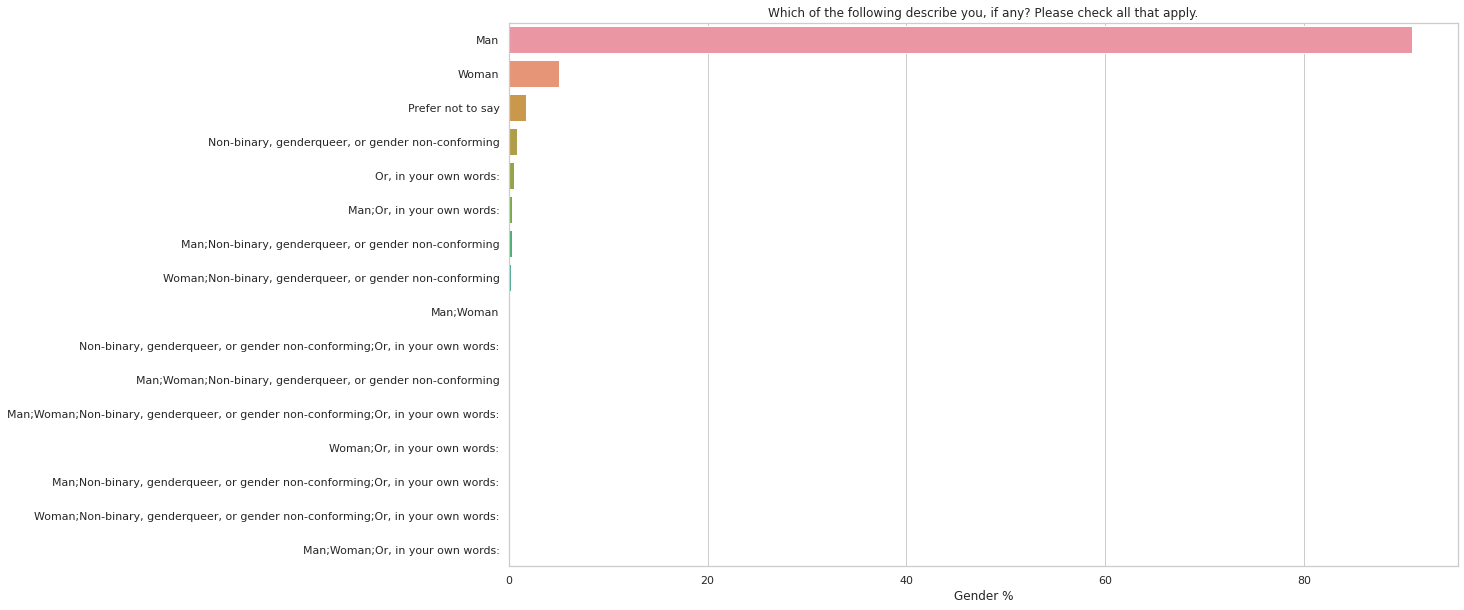

In [507]:
plt.figure(figsize=(17, 10))
gender_percent = (gender_count / gender_count.values.sum()) * 100
sns.barplot(x = gender_percent,y = gender_percent.index)
plt.rcParams.update({'font.size': 14})
plt.xlabel('Gender %')
plt.title(question_key['Gender'])

### Average Salary (Men vs Women)

We will compute it in USD as it is the most common one.

In [508]:
usd_salaries = responses_df[responses_df['Currency'] == 'USD United States dollar']

In [509]:
mens_salary= usd_salaries[usd_salaries['Gender'] == 'Man']
womens_salary= usd_salaries[usd_salaries['Gender'] == 'Woman']

In [510]:
mens_salary_total = mens_salary['CompTotal'].sum()

In [511]:
mens_salary_total

1e+74

That doesn't look right. I know developers make money but not this much money. Someone must've put in a random value to mess with people like us.
Let's dig deeper into it.

In [521]:
mens_salary.sort_values(by='CompTotal', ascending=False)['CompTotal']

68643    2880000.0
52832    2820000.0
52378    2700000.0
30372    2640000.0
60912    2640000.0
           ...    
47277          0.0
6653           0.0
26886          0.0
59937          0.0
6406           0.0
Name: CompTotal, Length: 10568, dtype: float64

As expected someone put in some crazy huge numbers. Let's just ignore them in this situation.

In [513]:
mens_salary = mens_salary[mens_salary['CompTotal'] < 3000000]
womens_salary = womens_salary[womens_salary['CompTotal'] < 3000000]

In [514]:
mens_salary_total = mens_salary['CompTotal'].sum()
womens_salary_total = womens_salary['CompTotal'].sum()

In [515]:
mens_salary_total

1580989593.0

Looks acceptable now.

In [516]:
mens_salary_avg = mens_salary_total / mens_salary.shape[0]
mens_salary_avg

149601.58904239212

In [517]:
womens_salary_avg = womens_salary_total / womens_salary.shape[0]
womens_salary_avg

128717.25384615385

There is almost a 10% difference in the salaries. We can compute this difference over multiple currencies to get even more insight.

### TODO: How the salary gap varies with age
### TODO: Compute difference with multiple currencies